In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
import ease_of_live_scripts as es
from scipy import optimize as fit
from pprint import *
import seaborn as sbs


In [20]:
sbs.set()

ValueError: `x0` is infeasible.

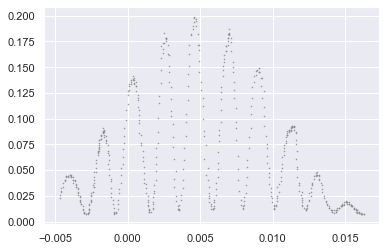

In [21]:
def newmodel(x,s,*args):
    return es.model_integrate(x,es.double_slit_model,s,*args)

pname=['s' ,'A', 'z', 'd', 'wl','L', 'offset']
z=0.855
wl=(6.328*(10**(-7)))
d=4.0e-5
L=25.0e-5
A=50
offset = -0.01
s = 0.001*0.05
data=es.read('exp1125/original parameters/double slit/0.04w 0.25s slit not centered symmeyricly','sweep1.txt')
r,c=[300,2000]
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)])) #x data agusted for distortion
ydata=-data['power'][int(c-r):int(c+r)]
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata,ydata,[s, A, z, d, wl, L , es.offset],
                         bounds=((0.05*0.001,0      ,z-0.001*z     ,d-0.001*d,wl-wl*0.001,L-0.001*L,0),
                                 ( 0.1*0.001,np.inf,z+0.001*z,d+0.001*d,wl+wl*0.001,L+0.001*L,0.1)))
plt.plot(xdata,es.model_integrate(xdata,es.double_slit_model,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('double slit interference 0.04mm spaced 0.25mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,es.model_integrate,popt)))


